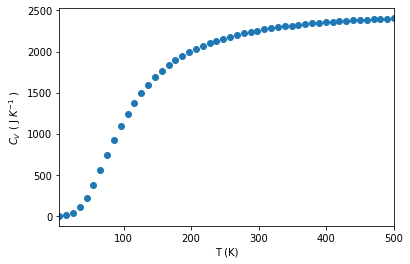

In [8]:
from gaussxw import gaussxw
import numpy as np
import matplotlib.pyplot as plt

V = 10**(-3) # Volume em m^3
k_B =  1.380649 * 10**(-23)# const. Boltzman
ro = 6.022*10**28 #densidade em m^(-3)
teta_D = 428 # Temperatura Debye em K

def cv(T):
    
    def f(x):
        return x**4 * np.exp(x) / (np.exp(x)-1)**2
    
    a = 0
    b = teta_D / T
    N = 50
       
    # Calculate the sample points and weights, then map them
    # to the required integration domain
    x,w = gaussxw(N)
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w
    
    # Perform the integration
    integral = 0.0
    for k in range(N):
        integral += wp[k]*f(xp[k])

    return 9 * V * ro * k_B * (T/teta_D)**3 * integral

T = np.linspace(5,500,50)
C = np.zeros(T.shape)
for i in range(50): 
    C[i] = cv(T[i])
    
plt.plot(T, C, 'o')
plt.xlim(5, 500)
plt.xlabel('T (K)')
plt.ylabel('$C_V$ ( J $K^{-1}$ )')
plt.show()